In [15]:
import pandas as pd
import numpy as np
import pyreadr # used for reading in rds data
import os
import re

In [9]:

# Get the list of all files and directories
path = '/Users/tianqizou/Documents/DOE/SCOOT/ApplyModel/SmallSample/scootApply/final_population'
dir_list = os.listdir(path)
files = [i for i in os.listdir(path) if not i.startswith(".")]
#files


In [13]:
# load nhts total trip count by MSA
nhts_total_trip_msa = pd.read_csv("/Users/tianqizou/Documents/DOE/SCOOT/ApplyModel/SmallSample/scootApply/nhts_total_trip_msa.csv")
nhts_total_trip_msa=nhts_total_trip_msa[nhts_total_trip_msa['HH_CBSA']!='XXXXX']
nhts_total_trip_msa['HH_CBSA']=pd.to_numeric(nhts_total_trip_msa['HH_CBSA'])
nhts_total_trip_msa

# read in generated tours and count total trip by MSA (number of rows in each generated tour file)
rds_len = []
rdsall = pd.DataFrame()
for msa in nhts_total_trip_msa['HH_CBSA']:
    #cbsa_cali.append(int(re.findall(rds)[0]))
    temp = pyreadr.read_r(path+'/'+'generated_tracts_'+str(msa)+'.rds')
    tempdf = temp[None]
    rdsall = rdsall.append([tempdf])
    rds_len.append(tempdf.shape[0])
    #print(msa)
print(rds_len)

12060
12420
12580
13820
14460
15380
16740
16980
17140
17460
18140
19100
19740
19820
24340
25540
26420
26900
27260
28140
29820
31080
31140
32820
33100
33340
33460
34980
35380
35620
36420
36740
37980
38060
38300
38900
39300
39580
40060
40140
40380
40900
41180
41620
41700
41740
41860
41940
42660
45300
47260
47900
[676277, 241370, 370762, 126147, 644171, 127204, 297512, 1091465, 266441, 252400, 238563, 826036, 304442, 494692, 131475, 189304, 775749, 227894, 173498, 245979, 241733, 1586967, 140488, 150143, 686363, 180738, 408513, 209653, 137797, 2177904, 157511, 265403, 691332, 541472, 262338, 277220, 132070, 112145, 144227, 443129, 117571, 276745, 316038, 96183, 276112, 365387, 573769, 169911, 386068, 334713, 199359, 659790]


Text(0, 0.5, 'Frequency')

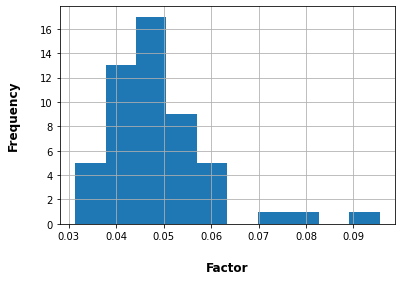

In [25]:

#cbsa_cali = [int(re.findall(r'\d+',msa)[0]) for msa in files ]

tour_cnt = pd.DataFrame({'cbsa':nhts_total_trip_msa['HH_CBSA'], 'cnt':rds_len})
tour_cnt=tour_cnt.merge(nhts_total_trip_msa, how='left', left_on = 'cbsa',right_on='HH_CBSA')
tour_cnt=tour_cnt.dropna()
tour_cnt['cnt_factor'] = tour_cnt['cnt_x']/tour_cnt['cnt_y']
tour_cnt = tour_cnt.rename(columns = {'cnt_x':'generated_trip_count', 'cnt_y':'nhts_trip_count'})


tour_cnt['cnt_factor'].describe()
x=tour_cnt['cnt_factor'].hist()

x.set_title("")

# Set x-axis label
x.set_xlabel("Factor", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)